In [1]:
import matplotlib.pyplot as plt
import json
import os

### Active Learning Results Comparison

File metrics_scibert_1_confidence_tabular.json not found.
File metrics_scibert_1_energy_tabular.json not found.
File metrics_scibert_1_entropy_tabular.json not found.
File metrics_scibert_1_margin_tabular.json not found.
File metrics_scibert_1_dropout_tabular.json not found.
File metrics_scibert_1_coreset_tabular.json not found.
File metrics_scibert_1_gmm_tabular.json not found.
File metrics_scibert_1_random_tabular.json not found.


/tmp/ipykernel_1163276/4128817520.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


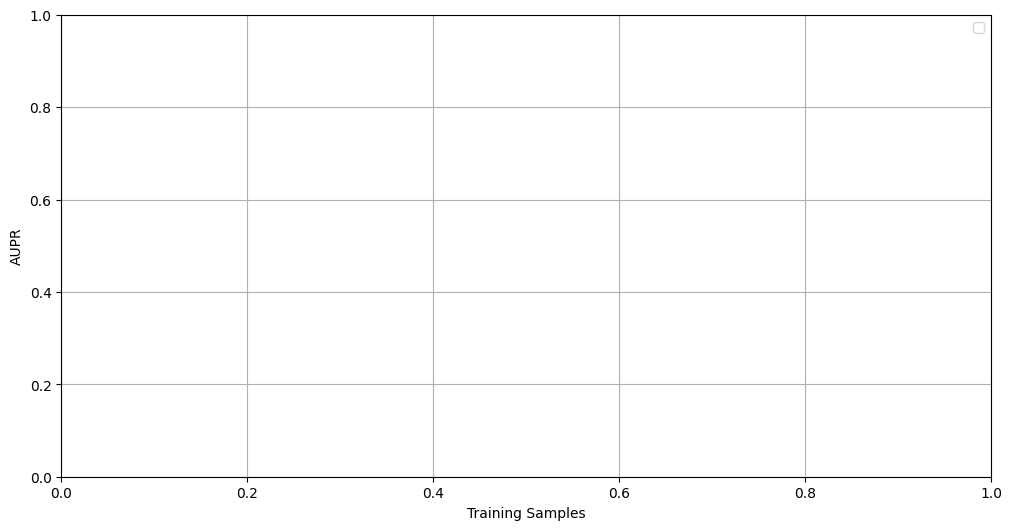

In [2]:
# List of JSON file names
json_files = [
    "metrics_scibert_1_confidence_tabular.json",
    "metrics_scibert_1_energy_tabular.json",
    "metrics_scibert_1_entropy_tabular.json",
    "metrics_scibert_1_margin_tabular.json",
    "metrics_scibert_1_dropout_tabular.json",
    "metrics_scibert_1_coreset_tabular.json",
    "metrics_scibert_1_gmm_tabular.json",
    "metrics_scibert_1_random_tabular.json"
]

# Colors for plotting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray']

# Plotting
plt.figure(figsize=(12, 6))
for i, file_name in enumerate(json_files):
    try:
        with open(os.path.join("../results", file_name), 'r') as file:
            data = json.load(file)
            # Extracting training samples and AUPR values from the "0" key
            training_samples = [entry['training_samples'] for entry in data['0'] \
                                if entry['training_samples'] in [600, 1100, 1600, 2100]]
            aupr_values = [entry['aupr'] for entry in data['0'] \
                           if entry['training_samples'] in [600, 1100, 1600, 2100]]
            plt.plot(training_samples, aupr_values, marker='o', label=file_name.split('_')[-2], color=colors[i])
    except FileNotFoundError:
        print(f"File {file_name} not found.")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

plt.xlabel('Training Samples')
plt.ylabel('AUPR')
# plt.title('AUPR vs Training Samples (Multiple Datasets)')
plt.grid(True)
plt.legend()
plt.savefig("../vis/al_aupr_comparison.png", dpi=150, bbox_inches='tight', pad_inches=0.1)
plt.show()



### OOD Detection Results Comparison

File metrics_scibert_1_energy_ood_tabular.json not found.
File metrics_scibert_1_entropy_ood_tabular.json not found.
File metrics_scibert_1_margin_ood_tabular.json not found.


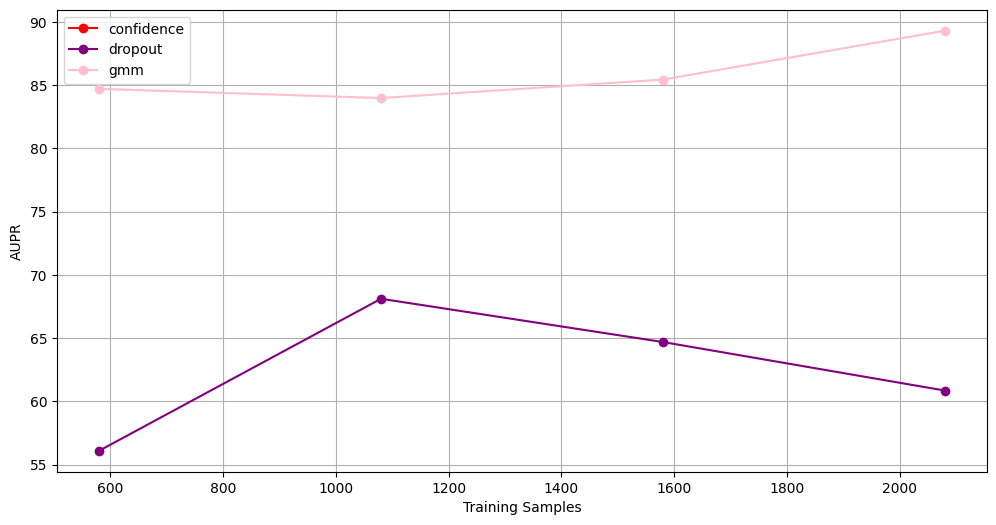

In [3]:
# List of JSON file names
json_files = [
    "metrics_scibert_1_confidence_ood_tabular.json",
    "metrics_scibert_1_energy_ood_tabular.json",
    "metrics_scibert_1_entropy_ood_tabular.json",
    "metrics_scibert_1_margin_ood_tabular.json",
    "metrics_scibert_1_dropout_ood_tabular.json",
    "metrics_scibert_1_gmm_ood_tabular.json",
]

# Colors for plotting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

# Plotting
plt.figure(figsize=(12, 6))
for i, file_name in enumerate(json_files):
    try:
        with open(os.path.join("../results", file_name), 'r') as file:
            data = json.load(file)
            # Extracting training samples and AUPR values from the "0" key
            training_samples = [entry['training_samples'] for entry in data['0'] \
                                if entry['training_samples'] in [580, 1080, 1580, 2080]]
            aupr_values = [entry['ood_auprc'] for entry in data['0'] \
                           if entry['training_samples'] in [580, 1080, 1580, 2080]]
            plt.plot(training_samples, aupr_values, marker='o', label=file_name.split('_')[-3], color=colors[i])
    except FileNotFoundError:
        print(f"File {file_name} not found.")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

plt.xlabel('Training Samples')
plt.ylabel('AUPR')
# plt.title('AUPR vs Training Samples (Multiple Datasets)')
plt.grid(True)
plt.legend()
plt.savefig("../vis/ood_aupr_comparison.png", dpi=150, bbox_inches='tight', pad_inches=0.1)
plt.show()
